In [1]:
### Author : Vasista
### Date   : 20/10/2018
### Topic  : House Price Prediction Using Regression

In [2]:
'''
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));
'''

'''fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
ax[1].scatter(x = train['GrLivArea'], y = train['SalePrice'])'''

"fig, ax = plt.subplots(nrows=1, ncols=2)\nax[0].scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])\nax[1].scatter(x = train['GrLivArea'], y = train['SalePrice'])"

In [3]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Read Dataset
train = pd.read_csv('C:\\House prediction data kaggle\\advncd reg tecniq house price pred\\train.csv')
test  = pd.read_csv('C:\\House prediction data kaggle\\advncd reg tecniq house price pred\\test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#--------- Descriptive Stats And Variable Exploration ---------#

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


skewness: 1.882876
jurtosis: 6.536282


NameError: name 'skew' is not defined

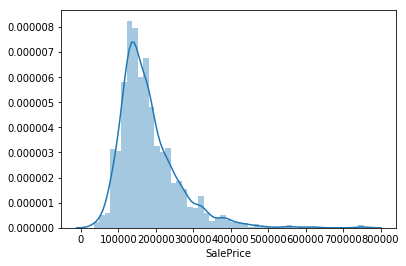

In [7]:
# UniVariable Study
# Let us see the distribution of Target Variable i.e. "SalePrice" 
sns.distplot(train['SalePrice'])
# From the above figure we could see skewnwss
# let us find the skew and kurtosis values
print("skewness: %f" % train['SalePrice'].skew())
print("jurtosis: %f" % train['SalePrice'].kurt())
print(skew)

In [ ]:
sns.distplot(train['SalePrice'],kde=False, bins=14)
plt.xlabel('saleprice')
plt.ylabel('frequency')
plt.legend(['bins = 14', train['SalePrice'].skew(), train['SalePrice'].kurt()])
plt.show()

In [ ]:
# By Variable Study of SalePrice with Other Numberical Variables.
# grlivarea/saleprice
sns.regplot(x = train['GrLivArea'], y = train['SalePrice'],color='g')
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('GrlivArea', fontsize=13)
cor = train['SalePrice'].corr(train['GrLivArea'])
plt.legend([cor*100])
plt.show()

# TotalBsmtSF/saleprice
sns.regplot(x = train['GrLivArea'], y = train['SalePrice'],color='g')
plt.ylabel('saleprice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
cor1 = train['SalePrice'].corr(train['TotalBsmtSF'])
plt.legend([cor1*100])
plt.show()
# Both GrlivArea and TotalBsmtSF Have High Correlation/Linear Relationship with SalePrice.
# Means As one variable increases other variable also increases.

In [ ]:
# RelationShip with Categorical Varibles
# OverallQual/SalePrice
print(train['OverallQual'].unique())
sns.boxplot(x=train['OverallQual'], y=train["SalePrice"], data=train)

In [ ]:
# YearBuilt/SalePrice
print(train['YearBuilt'].unique(), 
      max(train['YearBuilt'].unique()),
     min(train['YearBuilt'].unique()))
sns.boxplot(x=train['YearBuilt'], y=train["SalePrice"], data=train)
plt.legend(['year 1872 - 2010'])

# OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger 
# in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

In [ ]:
# Data Preprocessing

In [ ]:
# Remove Column Id
train_ID = train['Id']  # making a copy of column Id
test_ID = test['Id']
train.drop('Id', axis = 1, inplace = True)
test.drop('Id', axis = 1, inplace = True)

In [ ]:
# Missing Values
train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(method = 'backfill')
TotalBsmtSF_na = pd.DataFrame(train['TotalBsmtSF'])
type(TotalBsmtSF_na)

In [ ]:
train['TotalBsmtSF'].isnull().sum()

In [153]:
# Model Building
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# train_data = train[['TotalBsmtSF', 'SalePrice']]
# train_data = pd.DataFrame(train_data)

X = TotalBsmtSF_na
y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 10)
print(train_X.head(10))
lm = LinearRegression()
lm.fit(train_X, train_y)
y_pred = lm.predict(test_X)
print(y_pred)

mse = mean_squared_error(test_y,y_pred)
print(mse)
r2_score(test_y,y_pred)

      TotalBsmtSF
912           768
373           608
20           1158
800           616
152           825
906          1623
1109         1836
1007          546
264           680
1407          833
[ 257409.19011168  206788.65474407  176093.22372328  192894.93333466
  187832.8797979   178247.28905807  220359.26635326  159937.73371234
  218851.4206189   165753.71011628  172000.49958718  212927.74094823
  227467.68195807  157999.07491103  161014.76637974  151967.69197361
  261394.21098104  172539.01592088  172000.49958718  207757.98414472
  351111.03217513  192679.52680118  170061.84078587  127842.16022394
  183093.93606136  197203.06400424  144536.16656858  123534.02955436
  172646.71918762  152937.02137427  176093.22372328  132150.29089353
  160583.95331278  154337.16384188  185140.29812941  142166.69470031
  132365.69742701  160799.35984626  199464.83260578  177816.47599112
  154767.97690884  141197.36529965  164568.97418215  131719.47782657
  226175.2427572   186755.8471305   195910.

0.44031579716009017

In [131]:
print(lm.coef_)

[ 107.70326674]


In [132]:
print(lm.copy_X)

True


In [133]:
print(lm.fit)

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [134]:
print(lm.fit_intercept)

True


In [135]:
print(lm.get_params)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [136]:
print(lm.intercept_)

67528.3308498


In [137]:
print(lm.n_jobs)

1


In [138]:
print(lm.normalize)

False


In [139]:
print(lm.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [140]:
print(lm.rank_)

1


In [141]:
print(lm.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [146]:
lm.set_params

<bound method BaseEstimator.set_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [143]:
print(lm.singular_)

[ 14168.40185578]


In [145]:
print(lm.coef_)

[ 107.70326674]


In [147]:
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [150]:
GrLivArea_na = train['GrLivArea'].fillna(method='backfill')

In [162]:
data = train.loc[:, ['TotalBsmtSF','GrLivArea']]
data = data.fillna(method='backfill')

X = data
y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 10)
print(train_X.head(10))
lm1 = LinearRegression()
lm1.fit(train_X, train_y)
y_pred = lm1.predict(test_X)
print(y_pred)

mse = mean_squared_error(test_y,y_pred)
print(mse)
r2_score(test_y,y_pred)

      TotalBsmtSF  GrLivArea
912           768       1015
373           608       1319
20           1158       2376
800           616       1688
152           825       1993
906          1623       1636
1109         1836       1836
1007          546       1092
264           680        764
1407          833        833
[ 245340.4168536   177285.01222955  135754.26571558  171155.49418875
  262927.46012507  257603.29243311  194682.01967906  114247.78616687
  192674.74825452  164937.09141751  192052.67499726  183452.16834383
  202390.22783054  175586.14101213  138909.68062662  202566.35789155
  249308.4777328   133445.91843623  194559.30764005  177906.96563106
  368741.12749333  157917.80580702  149365.7751668   137195.35537114
  206736.90319929  163856.06565924  172703.87057826   85338.25353084
  183972.6110866   200347.46096457  137425.35414411  127389.29419885
  118032.45009873  177061.47500948  152811.15954844   90590.65866328
  152742.37368738  190760.88653597  282756.95531431  164785.

0.66070725317316081

In [163]:
print(lm1.coef_)

[ 59.8221089   83.55442143]


In [164]:
print(lm1.copy_X)

True


In [165]:
print(lm1.fit)

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [166]:
print(lm1.fit_intercept)

True


In [167]:
print(lm1.get_params)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [168]:
print(lm1.intercept_)

-8769.27685179


In [169]:
print(lm1.n_jobs)

1


In [170]:
print(lm1.normalize)

False


In [171]:
print(lm1.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [172]:
print(lm1.rank_)

2


In [173]:
print(lm1.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [174]:
print(lm1.set_params)

<bound method BaseEstimator.set_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [175]:
print(lm1.singular_)

[ 19216.97609128  11055.73597599]


In [179]:
data1 = train[['TotalBsmtSF','GrLivArea','2ndFlrSF','1stFlrSF','BsmtUnfSF','BsmtFinSF1','WoodDeckSF']]
data1 = data1.fillna(method = 'backfill')

X = data1
y = train['SalePrice']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 10)
print(train_X.head(10))
lm2 = LinearRegression()
lm2.fit(train_X, train_y)
y_pred = lm1.predict(test_X)
print(y_pred)

mse = mean_squared_error(test_y,y_pred)
print(mse)
r2_score(test_y,y_pred)

      TotalBsmtSF  GrLivArea  2ndFlrSF  1stFlrSF  BsmtUnfSF  BsmtFinSF1  \
912           768       1015         0      1015        279         489   
373           608       1319         0      1319          0         428   
20           1158       2376      1218      1158       1158           0   
800           616       1688      1072       616        154         462   
152           825       1993       896      1097        409         416   
906          1623       1636         0      1636       1560          63   
1109         1836       1836         0      1836        797        1039   
1007          546       1092       546       546          0         273   
264           680        764         0       764        680           0   
1407          833        833         0       833        208         625   

      WoodDeckSF  
912            0  
373           66  
20           240  
800          403  
152            0  
906            0  
1109         125  
1007         238  
264

0.66864801584384326

In [180]:
print(lm2.coef_)

[  22.02016447  -53.18346179  137.60849229  133.83772729   28.53960423
   39.00726828   80.87183396]


In [181]:
print(lm2.copy_X)

True


In [182]:
print(lm2.fit)

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [183]:
print(lm2.fit_intercept)

True


In [185]:
print(lm2.get_params)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [184]:
print(lm2.intercept_)

-6133.31693671


In [187]:
print(lm2.rank_)

7


In [188]:
print(lm2.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [9]:
train['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [10]:
# Variable convertion [Feature Engineering]


train['MSSubClass'] = train['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)



In [11]:
# Dummy Variables
cat_vars = train.select_dtypes(include=['object'])
dummy_cat_vars = pd.get_dummies(cat_vars)

num_vars = train.select_dtypes(exclude=['object'])

new_train = pd.concat([num_vars, dummy_cat_vars], axis=1)
new_train = new_train.fillna(method = 'bfill')
new_train.shape
target = pd.DataFrame(new_train['SalePrice'])
new_train.isnull().sum()

Id                       0
LotFrontage              0
LotArea                  0
OverallQual              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
                        ..
MoSold_11                0
MoSold_12                0
MoSold_2                 0
MoSold_3                 0
MoSold_4                 0
MoSold_5                 0
M

In [17]:
new_train['YrSold_2007'].dtypes

dtype('uint8')

In [211]:

X = new_train
y = target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 10)
print(train_X.head(10))
lm3 = LinearRegression()
lm3.fit(train_X, train_y)


      LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
912          51.0     6120            5       1925          1950         0.0   
373          79.0    10634            5       1953          1953         0.0   
20          101.0    14215            8       2005          2006       380.0   
800          79.0    12798            6       1997          1997         0.0   
152          84.0    14803            6       1971          1971       252.0   
906         116.0    13501            8       2006          2006       208.0   
1109        107.0    11362            8       2004          2005        42.0   
1007         21.0     2217            4       1970          1970         0.0   
264          30.0     5232            5       1925          2004         0.0   
1407         60.0     8780            5       1985          1985         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
912          489           0        279 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [214]:
y_pred = lm3.predict(test_X)
mse = mean_squared_error(test_y,y_pred)
r2_score(test_y,y_pred)

1.0

In [215]:
print(lm3.coef_)

[[ -9.35906549e-13   3.55271368e-15  -3.42612605e-11   6.56159155e-14
   -1.58544185e-13   5.75949878e-14   1.25103920e-14  -2.01085893e-14
   -3.31380431e-14  -4.07419324e-14   4.27529106e-14  -2.62251700e-14
   -1.86275962e-14  -2.10790586e-15   5.29612243e-12  -9.54579224e-13
   -1.86218529e-11   5.23302670e-13  -6.41596535e-12  -1.70711296e-11
    9.98421110e-12  -2.17538434e-12   7.17344749e-14   6.48659314e-12
    3.18035528e-14  -3.49876378e-14   2.17188870e-14   2.25276341e-14
    4.67922345e-14  -4.28114101e-14   4.02016670e-13   6.80044129e-15
    1.00000000e+00  -1.33929673e-11  -5.51761912e-12   4.12709476e-12
    1.25955437e-11  -3.42265781e-12   6.55906749e-12   7.13511554e-12
    3.78910874e-11  -1.77247274e-11  -4.30007763e-12  -8.06070193e-12
   -2.37962186e-11   4.69883113e-12  -1.82632184e-12   5.03455173e-12
    9.63471892e-12   1.63170045e-11  -1.92096465e-11  -8.59980139e-12
    1.85772434e-12  -1.49060534e-12   1.49060534e-12  -8.75016144e-13
    3.21605096e-12  

In [216]:
print(lm3.copy_X)

True


In [217]:
print(lm3.fit)

<bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [218]:
print(lm3.fit_intercept)

True


In [219]:
print(lm3.get_params)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [220]:
print(lm3.intercept_)

[  2.32830644e-10]


In [221]:
print(lm3.score)

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [222]:
print(lm3.rank_)

273


In [223]:
print(lm3.predict)

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
